In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib as plt
plt.style.use('fivethirtyeight')

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM , Dropout

from sklearn.preprocessing import MinMaxScaler


In [7]:
data_dir = 'BITCOIN_DATSETS/BTC-2021min.csv'
df = pd.read_csv(data_dir)

In [8]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [9]:
df.tail()


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
610777,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
610778,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610779,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610780,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279
610781,1609459260,2021-01-01 00:01:00,BTC/USD,29007.31,29086.90,29007.31,29083.47,14.561951,423512.060397


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.9+ MB


In [11]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,6.107820e+05,610782.000000,610782.000000,610782.000000,610782.000000,610782.000000,6.107820e+05
mean,1.627783e+09,46482.265381,46509.783597,46454.085712,46482.567211,3.165254,1.389474e+05
std,1.057906e+07,9453.990285,9454.798088,9453.135638,9454.107853,7.893321,3.298068e+05
min,1.609459e+09,28093.810000,28397.520000,27734.000000,28073.030000,0.000000,0.000000e+00
25%,1.618621e+09,38129.052500,38157.882500,38099.437500,38129.137500,0.193192,8.859586e+03
50%,1.627783e+09,46666.960000,46697.745000,46636.710000,46667.295000,0.924971,4.190121e+04
75%,1.636944e+09,54907.797500,54938.655000,54877.405000,54907.412500,2.989888,1.349341e+05
max,1.646106e+09,69000.000000,69000.000000,68799.990000,69000.000000,398.565948,1.396792e+07


In [13]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)

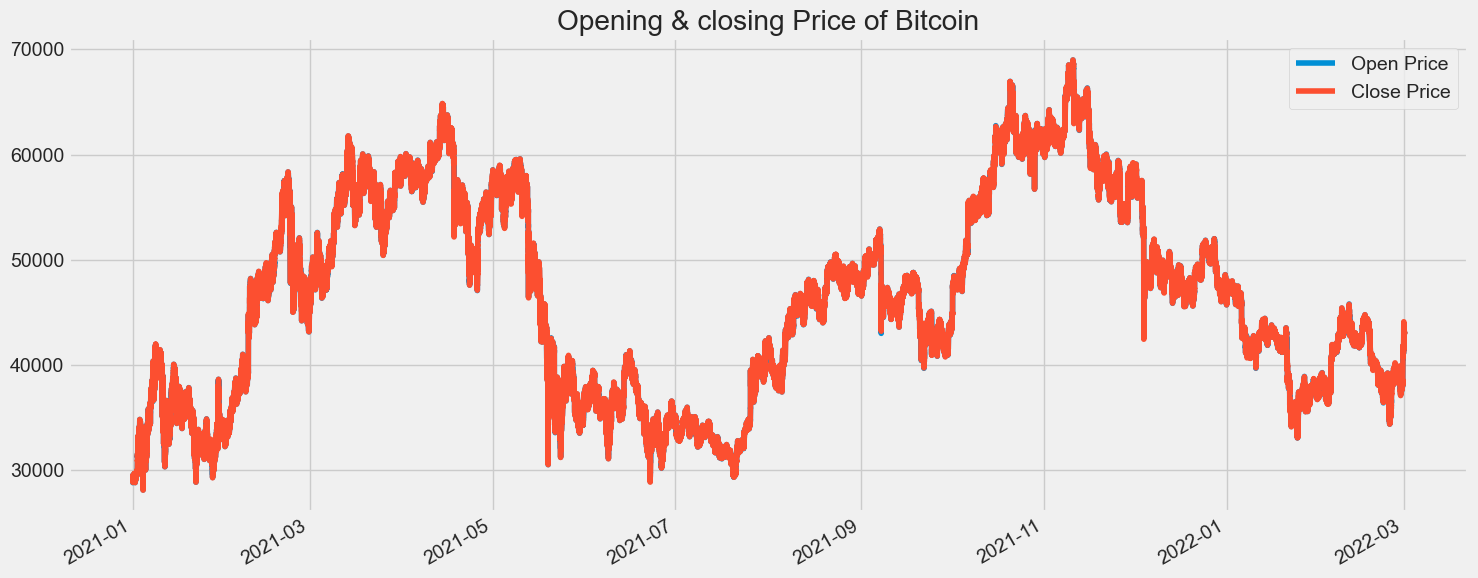

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
df[r'open'].plot()
df[r'close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening & closing Price of Bitcoin')
plt.legend(['Open Price' , 'Close Price'])
plt.tight_layout()
plt.show()

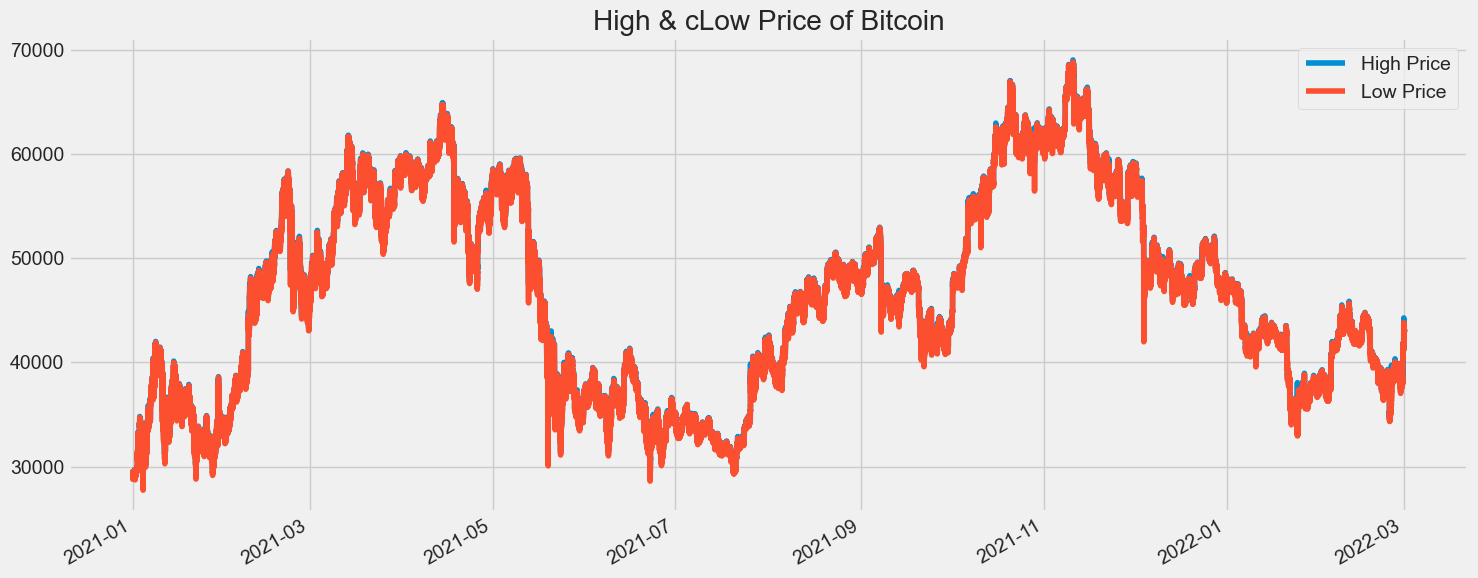

In [17]:
plt.figure(figsize=(15,6))
df[r'high'].plot()
df[r'low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('High & cLow Price of Bitcoin')
plt.legend(['High Price' , 'Low Price'])
plt.tight_layout()
plt.show()

In [21]:
n_cols = 1
dataset = df[r'close']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(610782, 1)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(np.array(data))

In [23]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print('Train Size: ' , train_size , 'Test Size: ' , test_size)

Train Size:  458086 Test Size:  152696


In [24]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(458086, 1)

In [28]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i <= time_steps:
        print('X_train: ', x_train)
        print('y_train: ', y_train)

X_train:  [array([[0.36586021],
       [0.36586021],
       [0.36511376],
       [0.36470841],
       [0.36593058],
       [0.36689474],
       [0.36693457],
       [0.36675425],
       [0.36712686],
       [0.36712686],
       [0.36735287],
       [0.36735287],
       [0.36700713],
       [0.36633032],
       [0.36588856],
       [0.36413861],
       [0.36376429],
       [0.36477829],
       [0.36546805],
       [0.36501358],
       [0.36496227],
       [0.36432651],
       [0.36434214],
       [0.36430574],
       [0.36325484],
       [0.36277863],
       [0.36426933],
       [0.36440396],
       [0.36407386],
       [0.36548907],
       [0.36593156],
       [0.36699492],
       [0.36689425],
       [0.36581672],
       [0.3673927 ],
       [0.36714079],
       [0.36689621],
       [0.36688936],
       [0.36723901],
       [0.36727542],
       [0.36790654],
       [0.36819168],
       [0.36866106],
       [0.36865812],
       [0.36901583],
       [0.36850492],
       [0.36886679],
  

In [33]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
x_train = np.reshape(x_train , (x_train.shape[0], x_train.shape[1], n_cols))

In [34]:
x_train.shape , y_train.shape

((458026, 60, 1), (458026, 1))

In [35]:
model = Sequential([
    LSTM(50, return_sequences = True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(64, return_sequences = False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer = 'adam' , loss = 'mse' , metrics = 'mean_absolute_error')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
14314/14314 [==============================] - 661s 46ms/step - loss: 4.7326e-05 - mean_absolute_error: 0.0029
Epoch 2/10
14314/14314 [==============================] - 687s 48ms/step - loss: 5.9689e-06 - mean_absolute_error: 0.0018
Epoch 3/10
14314/14314 [==============================] - 629s 44ms/step - loss: 4.4632e-06 - mean_absolute_error: 0.0015
Epoch 4/10
14314/14314 [==============================] - 624s 44ms/step - loss: 3.8956e-06 - mean_absolute_error: 0.0015
Epoch 5/10
14314/14314 [==============================] - 652s 46ms/step - loss: 3.5606e-06 - mean_absolute_error: 0.0014
Epoch 6/10
14314/14314 [==============================] - 655s 46ms/step - loss: 3.4084e-06 - mean_absolute_error: 0.0013
Epoch 7/10
14314/14314 [==============================] - 699s 49ms/step - loss: 3.3604e-06 - mean_absolute_error: 0.0013
Epoch 8/10
14314/14314 [==============================] - 701s 49ms/step - loss: 3.1899e-06 - mean_absolute_error: 0.0013
Epoch 9/10
14314/14314 [

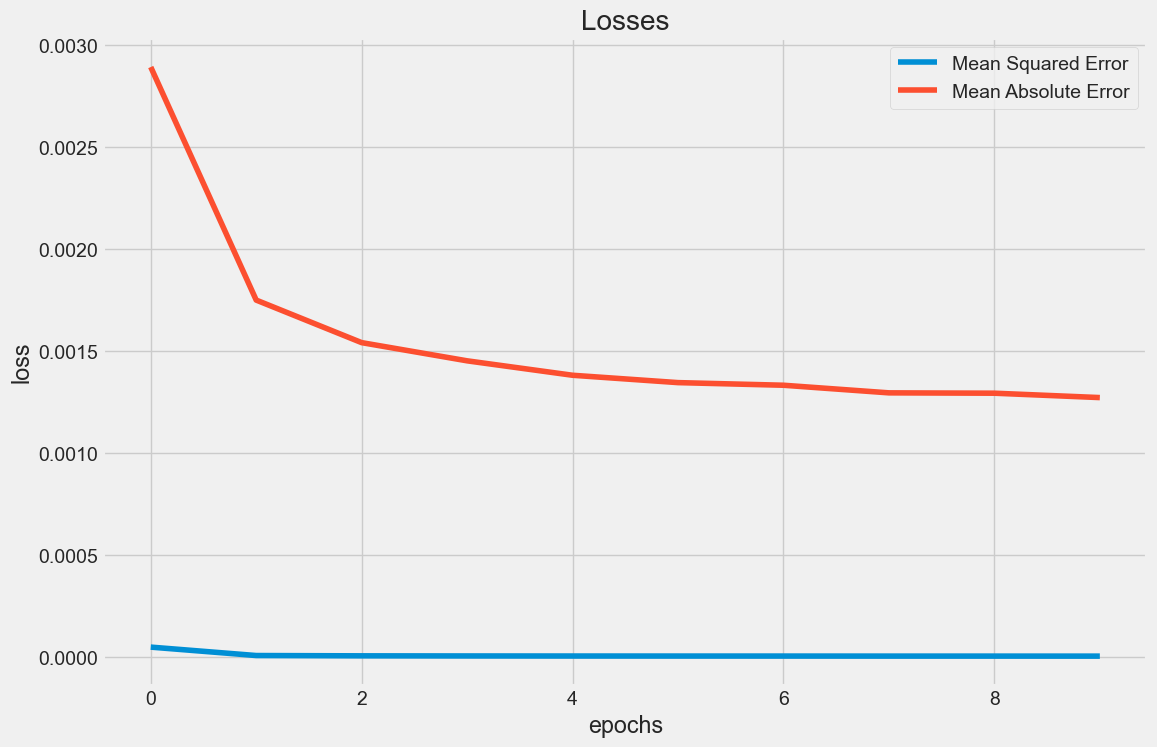

In [39]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error', 'Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [40]:
time_steps = 60
test_data = scaled_data[train_size - time_steps: , :]

x_test = []
y_test = []

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [41]:
x_test.shape, y_test.shape

((152696, 60, 1), (152696, 1))

In [42]:
predictions = model.predict(x_test)

4772/4772 [==============================] - 54s 11ms/step


In [43]:
predictions  = scaler.inverse_transform(predictions)
predictions.shape

(152696, 1)

In [44]:
y_test = scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean(y_test - predictions)**2).round(2)
rmse

30.36

In [45]:
preds_acts = pd.DataFrame(data={'Predictions': predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,61556.707031,61531.62
1,61490.871094,61511.61
2,61469.320312,61557.64
3,61512.050781,61502.98
4,61461.742188,61505.71
...,...,...
152691,29037.935547,28999.50
152692,29039.371094,29045.19
152693,29083.513672,29048.13
152694,29087.150391,29035.89


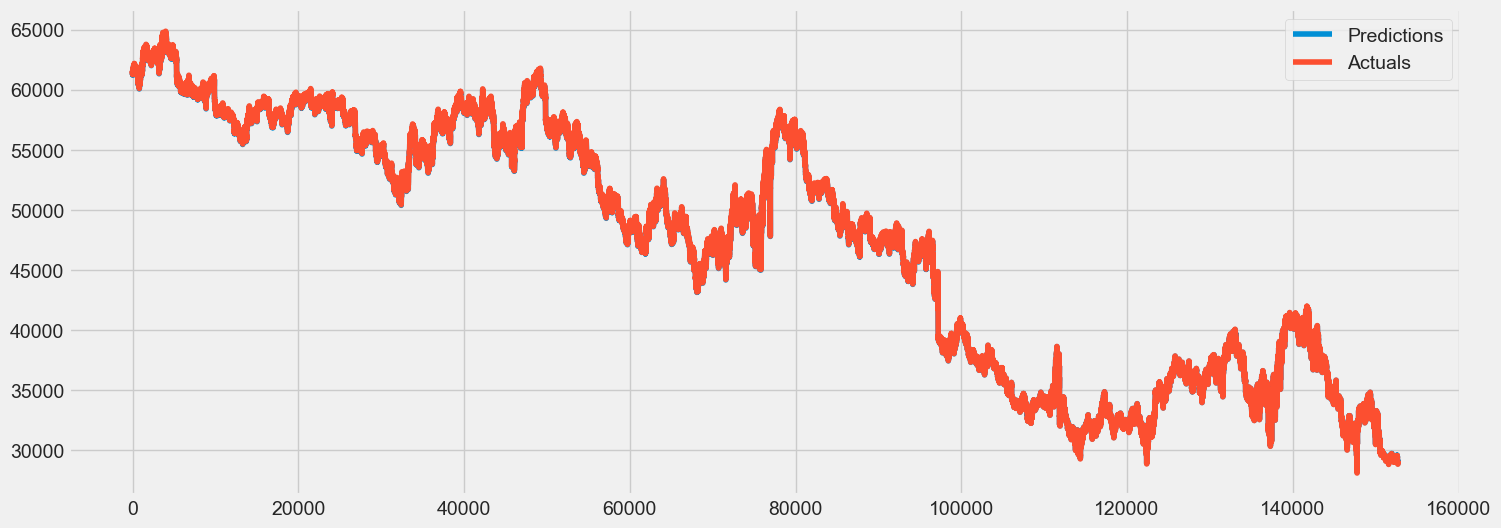

In [46]:
plt.figure(figsize = (16,6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions','Actuals'])
plt.show()

KeyError: 'close'

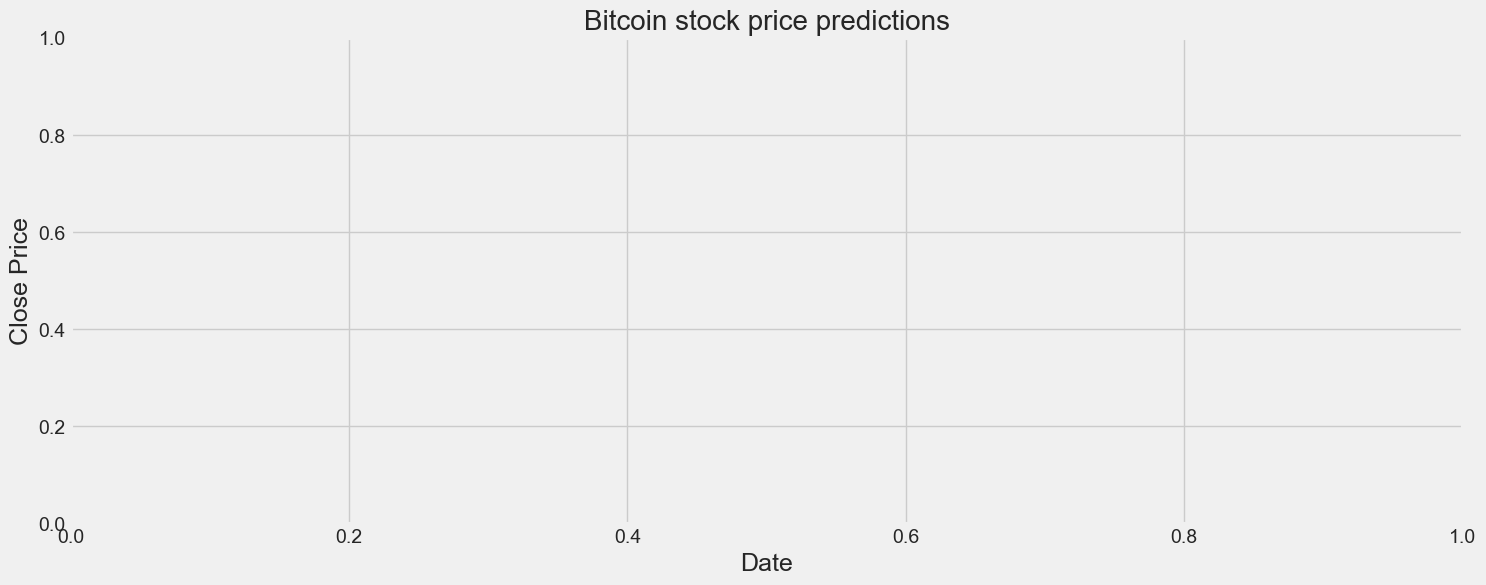

In [61]:
# train = dataset.iloc[:train_size, 0.1]
# test = dataset.iloc[train_size:, 0.1]

train = dataset.iloc[:train_size, 0]  # Select the first column
test = dataset.iloc[train_size:, 0]   # Select the first column

test ['Predictions'] = predictions

plt.figure(figsize = (16,6))
plt.title('Bitcoin stock price predictions', fontsize =20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price' , fontsize = 18)
plt.plot(train['close'].values, linewidth=3)
plt.plot(test['close'].values, linewidth=3)


plt.plot(test['Predictions'], linewidth = 3)
plt.legend(['Train','Test','Predictions'])